In [1]:
from datasets import load_from_disk
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
import os
from datasets import load_dataset

# 指向你那些 .arrow 文件所在的绝对路径
data_dir = "E:/DATASETS/25M_demo/old"

# 获取目录下所有的 arrow 文件
data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.arrow')]

# 按照本地 arrow 格式加载
ds = load_dataset(
    "arrow", 
    data_files=data_files,
    split="train"  # 手动指定这些数据属于 train 分片
)

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/18 [00:00<?, ?it/s]

In [7]:
print(f"✅ 成功加载！样本数: {len(ds)}")
print(f"特征结构: {ds.features}")

✅ 成功加载！样本数: 161630
特征结构: {'image': Image(mode=None, decode=True), 'id': Value('string'), 'caption': Value('string')}


In [10]:
print(ds[:1])

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x277C7531BD0>], 'id': ['8031efe0-1b5c-11ef-8929-000066532cad'], 'caption': ['The image is a non-contrasted computed tomography (CT) scan of the brain, showing the cerebral structures without any medical devices present. The region of interest, located centrally and in the middle of the image, exhibits an area of altered density, which is indicative of a brain hemorrhage. This area is distinct from the surrounding brain tissue, suggesting a possible hematoma or bleeding within the brain parenchyma. The location and characteristics of this abnormality may suggest a relationship with the surrounding brain tissue, potentially causing a mass effect or contributing to increased intracranial pressure.']}


In [12]:
# 现在可以进行可视化了
sample = ds[0]
print(sample['caption'])
print(sample['id'])

The image is a non-contrasted computed tomography (CT) scan of the brain, showing the cerebral structures without any medical devices present. The region of interest, located centrally and in the middle of the image, exhibits an area of altered density, which is indicative of a brain hemorrhage. This area is distinct from the surrounding brain tissue, suggesting a possible hematoma or bleeding within the brain parenchyma. The location and characteristics of this abnormality may suggest a relationship with the surrounding brain tissue, potentially causing a mass effect or contributing to increased intracranial pressure.
8031efe0-1b5c-11ef-8929-000066532cad


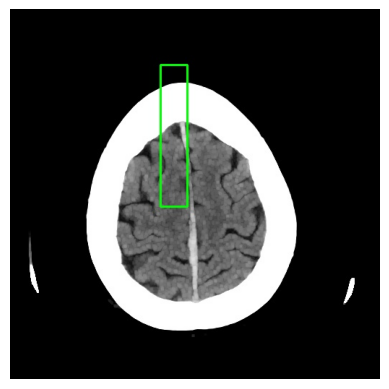

In [11]:
image = sample['image']
plt.imshow(image)
plt.axis('off')  # 不显示坐标轴
plt.show()

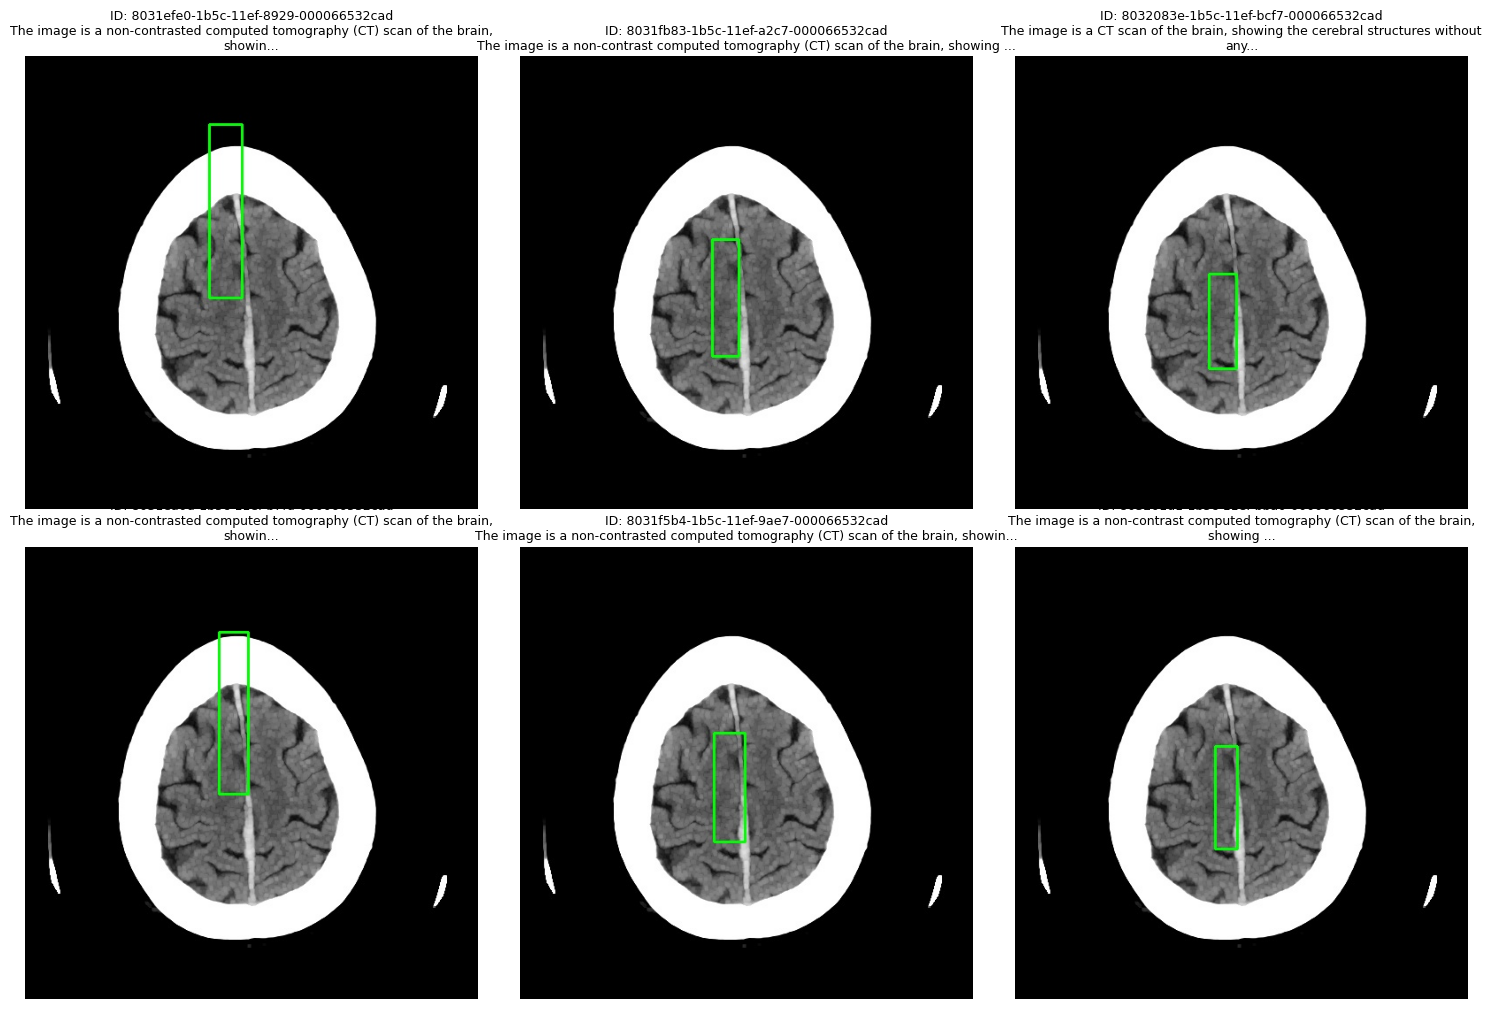

In [14]:
num = 6
plot_subset = ds.select(range(num))

# 设置子图的行列数，确保能容纳 num_samples_to_display 个图
# 例如，6 张图可以组织成 2 行 3 列 (2, 3)
num_rows = 2
num_cols = 3

# 创建一个大图 (figure) 和一组子图 (axes)
# figsize 控制整个大图的尺寸，根据你的图片比例和 PyCharm 窗口大小调整
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5)) 

# 将 axes 数组展平，方便迭代
axes = axes.flatten()

for i, sample in enumerate(plot_subset):
    if i >= num:
        break # 安全边界，如果样本不够，防止越界
        
    image = sample['image']
    caption = sample['caption']
    
    # 在当前子图上显示图片
    axes[i].imshow(image)
    axes[i].axis('off')  # 不显示坐标轴
    
    # 显示标题（ID 和 Caption），并进行截断处理，避免过长
    display_caption = f"ID: {sample['id']}\n"
    # 将长 caption 截断并显示前 80 个字符，防止标题过长影响布局
    display_caption += (caption[:80] + '...') if len(caption) > 120 else caption
    axes[i].set_title(display_caption, fontsize=9, wrap=True) # wrap=True 允许标题自动换行

# 隐藏任何多余的子图（如果 num_samples_to_display 小于 num_rows * num_cols）
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout() # 自动调整子图参数，使之填充整个 figure 区域，避免重叠
plt.show() # 显示整个大图，在 PyCharm SciView 中展示

In [15]:
import json

In [17]:
def save_images_and_json(ds, output_dir="mllm_data"):
    """
    将数据集中的图像和对应的 JSON 信息保存到指定目录。

    参数:
    ds: 数据集对象，包含图像和标题。
    output_dir: 输出目录，默认为 "mllm_data"。
    """
    # 创建输出目录
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 创建一个列表来存储所有的消息和图像信息
    all_data = []

    # 遍历数据集中的每个项目
    for item in ds:
        img_path = f"{output_dir}/{item['id']}.jpg"  # 图像保存路径
        image = item["image"]  # 假设这里是一个 PIL 图像对象

        # 将图像对象保存为文件
        image.save(img_path)  # 使用 PIL 的 save 方法

        # 添加消息和图像信息到列表中
        all_data.append(
            {
   
                "messages": [
                    {
   
                        "content": "<image>图片中的诊断结果是怎样?",
                        "role": "user",
                    },
                    {
                        "content": item["caption"],  # 从数据集中获取的标题
                        "role": "assistant",
                    },
                ],
                "images": [img_path],  # 图像文件路径
            }
        )

    # 创建 JSON 文件
    json_file_path = f"{output_dir}/mllm_data.json"
    with open(json_file_path, "w", encoding='utf-8') as f:
        json.dump(all_data, f, ensure_ascii=False)  # 确保中文字符正常显示

In [18]:
save_images_and_json(ds)

KeyboardInterrupt: 

In [37]:
# 方案：只读取文件的前 1024 字节来观察基本键值
with open('E:/DATASETS/25M_demo/new/mllm_data.json', 'r', encoding='utf-8') as f:
    head = f.read(2048)
    print("--- 文件头结构探测 ---")
    print(head)

--- 文件头结构探测 ---
[{"messages": [{"content": "<image>图片中的诊断结果是怎样?", "role": "user"}, {"content": "The image is a non-contrasted computed tomography (CT) scan of the brain, showing the cerebral structures without any medical devices present. The region of interest, located centrally and in the middle of the image, exhibits an area of altered density, which is indicative of a brain hemorrhage. This area is distinct from the surrounding brain tissue, suggesting a possible hematoma or bleeding within the brain parenchyma. The location and characteristics of this abnormality may suggest a relationship with the surrounding brain tissue, potentially causing a mass effect or contributing to increased intracranial pressure.", "role": "assistant"}], "images": ["mllm_data/8031efe0-1b5c-11ef-8929-000066532cad.jpg"]}, {"messages": [{"content": "<image>图片中的诊断结果是怎样?", "role": "user"}, {"content": "The image is a non-contrast computed tomography (CT) scan of the brain, showing the cerebral hemispheres w

Root (Array): 包含所有样本的列表

Item (Object): 单条训练数据

messages (Array): 对话流

role (String): "user" 或 "assistant"

content (String): 文本内容（包含 "< image >" 占位符）

images (Array): 关联图片路径列表

In [20]:
json_path = "E:/DATASETS/25M_demo/new/mllm_data.json"